In [1]:
import cairo
from IPython.display import Image as iPyImage
from IPython.display import display
from math import pi
from io import BytesIO
from math import sin, cos
import numpy as np
from random import random
from PIL import Image as PILImage

def load_image_grayscale(file):
    """0 indicates white, 255 indicates black"""
    img = PILImage.open(file).convert('L')
    img.load()
    data = 255 - np.asarray(img, dtype="int")
    return data / 255

img = load_image_grayscale('img.jpg')

WIDTH, HEIGHT = img.shape[1], img.shape[0]

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    ctx = cairo.Context(surface)
    draw_func(ctx, WIDTH, HEIGHT)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(iPyImage(fileobj.getvalue(), width=WIDTH))

def disp2(draw_func):
    with cairo.SVGSurface("example.svg", WIDTH, HEIGHT) as surface:
        ctx = cairo.Context(surface)
        draw_func(ctx, WIDTH, HEIGHT)

In [2]:
def arc_mask(r, d, t0, dt):
    surface = cairo.ImageSurface(cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    cr = cairo.Context(surface)
    cr.scale(WIDTH, HEIGHT)

    cr.set_source_rgb(1, 1, 1)
    cr.arc(0.5, 0.5, r, t0, t0+dt)
    cr.set_line_width(d * 2)
    cr.stroke()

    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        # display(iPyImage(fileobj.getvalue(), width=WIDTH))
        img = PILImage.open(fileobj).convert('L')
        img.load()
        data = np.asarray(img, dtype="int")
        return data / 255

# arc_mask(0.3, 0.01, -pi/4, pi/4)

def get_d1_d2(r, d, t0, dt):
    mask = arc_mask(r, d, t0, dt)
    area = max(1, mask.sum())
    scale = (img * mask).sum()
    return scale / area

# get_d1_d2(0.3, 0.01, -pi/4, pi/4)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


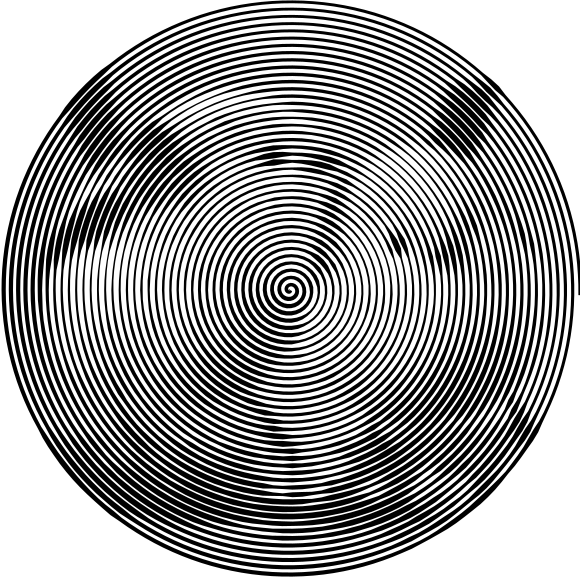

In [4]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_source_rgb(1, 1, 1)
    cr.paint()
    def get_point(th, r):
        return ((r * cos(th) + .5), (r * sin(th) + .5))

    def arc(r, d1, d2, t0, dt):
        r1 = r - d1
        r2 = r + d2
        th = t0 + dt / 2
        return get_point(th, r1), get_point(th, r2)

    cr.set_source_rgb(0, 0, 0)
    loop_num = 40
    seg_base = 20
    seg_inc = 4
    line_width = 0.001
    a = 0.5 / (2 * pi * loop_num)
    l1, l2 = [], []
    for loop in range(loop_num):
        print(loop)
        seg_num = seg_base + loop * seg_inc
        dt = 2 * pi / seg_num
        for th in np.linspace(2*pi*loop, 2*pi*(loop+1), seg_num):
            d = pi * a
            d1 = d2 = d * get_d1_d2(a * th, d, th, dt) * 0.9
            p1, p2 = arc(a * th, d1, d2, th, dt)
            l1.append(p1)
            l2.append(p2)
    cr.move_to(0.5, 0.5)
    for p in l1:
        cr.line_to(p[0], p[1])
    for p in reversed(l2):
        cr.line_to(p[0], p[1])
    cr.close_path()
    cr.fill()

In [3]:
# 涂arc, 而非连线
# @disp
# def draw(cr, width, height):
#     cr.scale(width, height)

#     def arc(cr, r, d1, d2, t0, dt):
#         r_ = r + (d2 - d1) / 2
#         cr.arc(0.5, 0.5, r_, t0, t0+dt)
#         cr.set_line_width(d1+d2)
#         cr.stroke()

#     loop_num = 5
#     seg_base = 6
#     seg_inc = 0
#     line_width = 0.002
#     a = 0.5 / (2 * pi * loop_num)
#     for loop in range(loop_num):
#         seg_num = seg_base + loop * seg_inc
#         dt = 2 * pi / seg_num
#         for th in np.linspace(2*pi*loop, 2*pi*(loop+1), seg_num):
#             dist = 2 * pi * a / 2
#             # d1 = line_width / 2 + random() * line_width
#             # d2 = line_width / 2 + random() * line_width
#             # d1 = max(line_width, dist * abs(th%(2*pi)-pi)/pi * .8)
#             # d2 = max(line_width, dist * abs(th%(2*pi)-pi)/pi * .8)
#             d1 = d2 = line_width
#             arc(cr, a * th, d1, d2, th, dt)

#     seg_base = 360
#     for loop in range(loop_num):
#         seg_num = seg_base + loop * seg_inc
#         dt = 2 * pi / seg_num
#         for th in np.linspace(2*pi*loop, 2*pi*(loop+1), seg_num):
#             d1 = d2 = line_width / 2
#             arc(cr, a * th, d1, d2, th, dt)